In [41]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, extract, func

In [105]:
database_path = "hawaii.sqlite"

# Create Engine
engine = create_engine(f"sqlite:///{database_path}")


In [106]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# get the table names from the classes - references all the names of the classes=tables
Base.classes.keys()

['measurement', 'station']

In [107]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [108]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# function extract returns us given year,month/day, june is the 6th
month_of_June = session.query(Measurement).filter(extract('month', Measurement.date) == 6)
print(month_of_June)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [109]:
#  3. Convert the June temperatures to a list.
month_of_June_list = [temps.tobs for temps in month_of_June]

In [110]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(month_of_June_list, columns=['June Temps'])
print(june_temps_df)

      June Temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [111]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [112]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_of_Dec = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [113]:
# 7. Convert the December temperatures to a list.
month_of_Dec_list = [temp.tobs for temp in month_of_Dec]

In [114]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(month_of_Dec_list, columns = ["December Temps"])
print(dec_temps_df)

      December Temps
0               76.0
1               74.0
2               74.0
3               64.0
4               64.0
...              ...
1512            71.0
1513            71.0
1514            69.0
1515            65.0
1516            65.0

[1517 rows x 1 columns]


In [115]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [139]:
#  two additional queries to perform to gather more weather data for June and December.
results=session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6, Measurement.prcp > 2.5).all()

df = pd.DataFrame(results, columns=['rainy days in June'])
print(df)

   rainy days in June
0                4.43
1                4.02
2                3.60
3                2.56
4                2.80


In [140]:
#  two additional queries to perform to gather more weather data for June and December.
results=session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12, Measurement.prcp > 2.5).all()

df = pd.DataFrame(results, columns=['rainy days in December'])
print(df)

    rainy days in December
0                     3.18
1                     4.94
2                     2.95
3                     2.55
4                     2.80
5                     2.86
6                     4.95
7                     2.77
8                     3.06
9                     3.14
10                    4.00
11                    3.05
12                    3.00
13                    5.04
14                    6.42
15                    4.03


<AxesSubplot:>

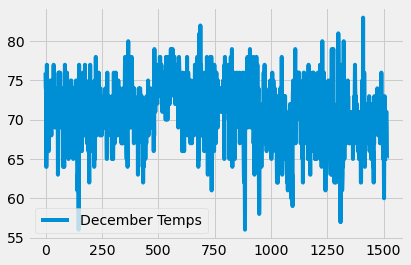

In [116]:
dec_temps_df.plot()

<AxesSubplot:>

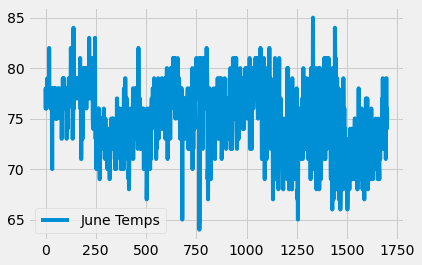

In [117]:
june_temps_df.plot()